<a href="https://colab.research.google.com/github/TapanManu/Pytorch-Repo/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from torchvision import datasets,transforms
import torch
from torch import nn
import torch.nn.functional as F

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5]),
                                ])

#downloading FASHION MNIST Dataset
trainset = datasets.FashionMNIST('Fashion-MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()


<Figure size 432x288 with 0 Axes>

Training

In [0]:
from torch import optim


model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0015)

epochs = 5
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    output = model.forward(images)
    optimizer.zero_grad()
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print('loss :',running_loss/len(trainloader))


loss : 0.5125503321922918
loss : 0.37714363313687127
loss : 0.33882232904751924
loss : 0.31501564705200286
loss : 0.29828471111368016


Testing

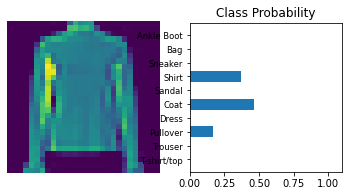

In [0]:
import matplotlib

images,labels = next(iter(testloader))
img = images[0].view(1,784)
ps = torch.exp(model(img))
view_classify(img.view(1,28,28),ps,version='Fashion')

Validation

In [0]:
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0015)

epochs = 5
trainloss,testloss = [],[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    output = model.forward(images)
    optimizer.zero_grad()
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    test_loss=0
    accuracy=0
    with torch.no_grad():
      for images,labels in testloader:
        images = images.view(images.shape[0],-1)
        ps = model.forward(images)
        test_loss+= criterion(ps,labels).item()
        top_p,top_labels = ps.topk(1,dim=1)
        equals = top_labels == labels.view(*top_labels.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    trainloss.append(running_loss/len(trainloader))
    testloss.append(test_loss/len(testloader))
    print('training-loss:',trainloss[-1],' ','test-loss:',testloss[-1])
    print('Accuracy:',accuracy.item()/len(testloader))


training-loss: 0.5098728060658807   test-loss: 0.38501841551872457
Accuracy: 0.8565098614072495
training-loss: 0.38007556624027455   test-loss: 0.3844109529307656
Accuracy: 0.8506296641791045
training-loss: 0.33971199037423777   test-loss: 0.2937089017411666
Accuracy: 0.8915245202558635
training-loss: 0.314574664621465   test-loss: 0.27308577221276154
Accuracy: 0.8998867270788913
training-loss: 0.29573379907367836   test-loss: 0.2711251290685841
Accuracy: 0.8996035447761194


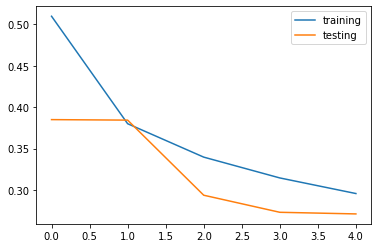

In [60]:
import matplotlib.pyplot as plt
plt.plot(trainloss,label='training')
plt.plot(testloss,label='testing')
plt.legend()
plt.show()